### 1.1 FSA
a) Construct an FSA that accepts (absolute) dates of the following form:  
Mittwoch, 1. März 2004  
Sonntag, den 4. 4. 1920  
You may use words as transitions and use simplified representation of edges, e.g. in the form of: 0...9.  
b) Extend the FSA to also accept (relative) dates like  
gestern  
übermorgen  
nächsten Donnerstag  

![Date FSA](img/days.jpg)

### 1.2 Regexp Search


a) Define an FSA for the search pattern b(an)*e

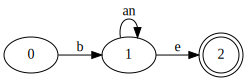

In [1]:
from graphviz import Digraph
rfsa = Digraph()
rfsa.graph_attr['rankdir'] = 'LR'
rfsa.node('0')
rfsa.node('1')
rfsa.node('2', shape='doublecircle')


rfsa.edge('0', '1', label='b')
rfsa.edge('1', '1', label='an')
rfsa.edge('1', '2', label = 'e')
rfsa

b) run this FSA on the following string, at this recording the set of current states.  
Output: offsets of all pattern matches: “turbane über bananenbanden”

In [2]:
import re
re.findall('b[an]*e', 'turbane über bananenbanden')

['bane', 'be', 'banane']

The FSA matches on all marked letters: turBANE üBEr BANANEnbanden

### 1.3 Phrase Structure Grammer

a) Give all derivations of `the elephant saw the man with the telescope with the telescope`

Actually, this is pretty confusing visually so to help you understand my solution, this are the three derivations:
1. the elephant | saw | the man with the telescope with the telescope : elephant sees man wielding a double telescope
2. the elephant | saw | the man with the telescope | with the telescope : elephant looks through telescope and sees man with telescope
3. the elephant | saw | the man | with the telescope with the telescope : elephant looks through double telescope and sees a man

Graphically displayed, it looks like this:
![elephant](img/elephant.jpg)

b) do following sentences belong to L(G)?
1. I saw the man with the saw? ---- No! Saw is only as V(erb) in our dictioniary, and G does not allow V at the end of S, only N(ouns)
2. I lost an pajamans          ---- Yes! S &#8594; (NP &#8594; (N &#8594; I)) (VP &#8594; (V &#8594; lost) (NP &#8594;(DN &#8594; (D &#8594; an) (N &#8594; pajamas) ) ) )  

c) The grammar G does not ensure that the correct indefinite determiner (“a” vs. “an”) is chosen, depending on the following noun (“an elephant” vs. “a man”). How could the grammar be modified to a grammar H accordingly? Provide the transition function of H  
H :   
S &#8594; NP VP  
NP &#8594; N1 | N2 | DN | NP PP  
DN &#8594; D1 N1 | D2 N2 | D N1 | D N2 | D N | D1 N | D2 N  
VP &#8594; V NP | V NP PP  
PP &#8594; P NP  
N &#8594; I  
N1 &#8594; elephant  
N2 &#8594; pajamas | man | telescope  
V &#8594; shot | lost | held | saw  
P &#8594; in | with  
D &#8594; my | the  
D1 &#8594; an  
D2 &#8594; a